# 第10章　Pandas: 経済データ分析I（2/2）

## はじめに

In [1]:
# CELL PROVIDED
# %pip install -q japanize-matplotlib py4macro

In [2]:
# CELL PROVIDED
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py4macro

plt.rcParams['figure.figsize'] = (5, 3.3)

## 簡単なデータ分析

### 一人当たりGDP

* GDP（国内総生産）
    * 経済全体で生産された財・サービス（最終財）を円単位で合計
    * <span style="color:red">生産側GDP</span>
* 生産されたものは購入（消費や投資）される
    * 購入額の合計：支出側GDP
    * <span style="color:red">生産側GDP</span> = <span style="color:red">支出側GDP</span>
    * 「売れ残り」= 在庫投資（投資支出の一部）
* 誰かが購入すると誰かの所得となる
    * 所得の合計：分配側GDP
    * <span style="color:red">支出側GDP</span> = <span style="color:red">分配側GDP</span>

$$
\text{生産側GDP = 支出側GDP = 分配側GDP}
$$

これを<span style="color:blue">三面等価の原則</span>と呼ぶ

2024年名目GDP

$$\phantom{ttt}$$

$$\phantom{ttt}$$

$$\LARGE \text{約}609,000,000,000,000\text{円}$$

又は

$$\LARGE \text{約}609\text{兆円}$$

$$\phantom{ttt}$$

$$\phantom{ttt}$$

* 総生側GDP = 総支側GDP = <span style="color:red">分配側GDP</span>
* 分配側GDP = 所得の総合計
* 一人当たりGDPの意味

$$
\text{一人当たりGDP}=\frac{\text{GDP}}{\text{人口}}=\frac{\text{所得の総合計}}{\text{人口}}=\text{一人当たり所得}
$$

* 解釈
    * 総所得を全ての人に平等に同じ金額を分配した場合の金額
    * 「平均的な人」で捉えた生活水準
* 以下では、一人当たり実質GDPのデータを使い、日本の生活水準の変化を考える

コード10.3.1

In [3]:
df2 = pd.read_csv("data2.csv")

print(f"行：{df2.shape[0]}")
print(f"列：{df2.shape[1]}")

df2.head(3)

行：45
列：3


,year,gdp,pop
0,1980,273389.5,11676.9
1,1981,285037.6,11762.3
2,1982,294386.1,11845.1


* `year`：暦年
* `gdp`：国内総生産（単位：10億円，実質，2015暦年連鎖価格）
* `pop`：人口（単位：万人）

コード10.3.2

In [4]:
df2["gdppc"] = df2["gdp"] / df2["pop"]
df2["gdppc_log"] = np.log( df2["gdppc"] )
df2.tail(3)

,year,gdp,pop,gdppc,gdppc_log
42,2022,548863.4,12506.3,43.886953,3.781617
43,2023,556487.4,12448.2,44.704246,3.800068
44,2024,557434.1,12389.0,44.994277,3.806535


プロットのコード
```
plt.plot(df2["＜列ラベル＞"], df2["＜列ラベル＞"])
plt.plot("＜列ラベル＞", "＜列ラベル＞", data=df2)
```

コード10.3.3

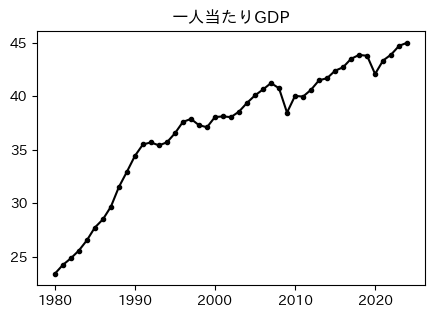

In [5]:
plt.plot("year", "gdppc",
         data=df2,
         color="black",
         marker=".")
plt.title("一人当たりGDP")
plt.show()

コード10.3.4

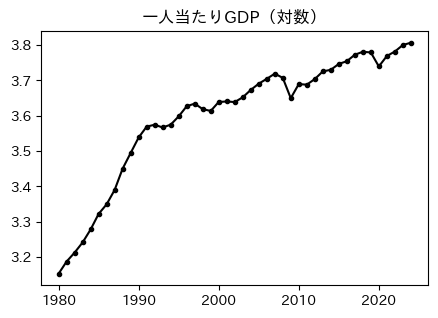

In [6]:
plt.plot("year", "gdppc_log",
         data=df2,
         color="black",
         marker=".")
plt.title("一人当たりGDP（対数）")
plt.show()

### 成長率

* $y_t$：$t$年のGDP
* GDPの成長率（変化率）：$g_t$

$$
g_t=\frac{y_{t}}{y_{t-1}}-1
\quad\Rightarrow\quad
1+g_t=\frac{y_{t}}{y_{t-1}}
$$

* 例：$y_{t}=105$、$y_{t-1}=100$

$$1.05=\frac{105}{100}\quad\Rightarrow\quad\text{5％}$$
  
* 両辺の自然対数をとる
$$
\log(1+g_t)=\log(y_{t})-\log(y_{t-1})
$$

$$
\qquad\qquad\quad\Downarrow\quad\\
\text{左辺を近似}\;\log(1+g_t)\\
\approx g_t
$$

$$
g_t\approx\log(x_{t+1})-\log(x_{t})
$$

* 縦軸に`y_t`の対数，横軸に時間をおけば，プロットの傾きは`y_t`の成長率と等しい

コード10.3.5

In [7]:
df2["growth"] = 100 * df2[["gdppc_log"]].diff()
df2[["gdppc_log", "growth"]].head()

,gdppc_log,growth
0,3.153285,NaN
1,3.187722,3.443661
2,3.212978,2.525629
3,3.241738,2.875975
4,3.278391,3.665359


コード10.3.6

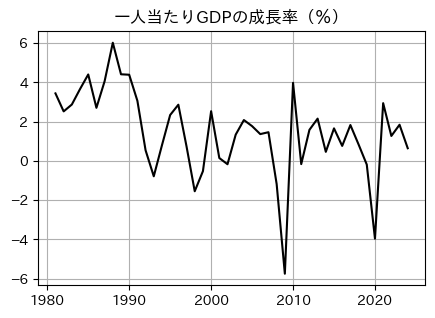

In [8]:
plt.plot("year", "growth",
         data=df2,
         color="black")
plt.title(
    "一人当たりGDPの成長率（％）"
    )
plt.grid()
plt.show()

コード10.3.7

In [9]:
print( df2["growth"].max() )
print( df2["growth"].min() )

6.026368326577813
-5.751244457247084


### 平均成長率

コード10.3.8

In [10]:
# df2["gdppc"].pct_change()

コード10.3.9

In [11]:
print( df2["growth"].mean() )

1.484659820145108


### GDPの構成要素

コード10.3.10

In [12]:
df3 = pd.read_csv("data3.csv")
df3.columns

Index(['year', 'gdp', 'consumption', 'investment', 'government', 'exports',
       'imports'],
      dtype='object')

コード10.3.11

In [13]:
# CELL PROVIDED

print(f"行：{df3.shape[0]}")
print(f"列：{df3.shape[1]}")

行：45
列：7


コード10.3.12

In [14]:
df3["netx"] = (df3["exports"] - df3["imports"])

コード10.3.13

In [15]:
cols = ["consumption", "investment", "government", "netx"]
ratios = ["con/gdp", "inv/gdp", "gov/gdp", "nx/gdp"]

for ratio, col  in zip(ratios, cols):
    df3[ratio] = df3[col] / df3["gdp"]

df3.columns

Index(['year', 'gdp', 'consumption', 'investment', 'government', 'exports',
       'imports', 'netx', 'con/gdp', 'inv/gdp', 'gov/gdp', 'nx/gdp'],
      dtype='object')

コード10.3.14

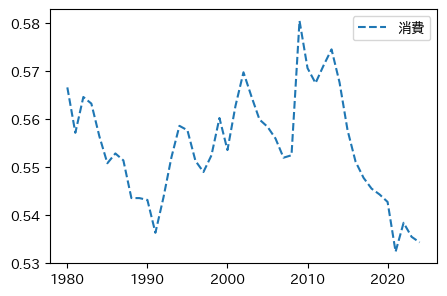

In [16]:
plt.plot("year", "con/gdp", data=df3,
         # color="black",
         linestyle="--",
         label="消費"
        )
plt.legend()
plt.show()

コード10.3.15

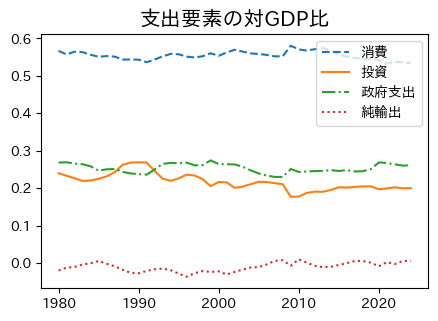

In [17]:
# CELL PROVIDED

labels = ["消費", "投資", "政府支出", "純輸出"]
styles = ["--", "-", "-.", ":"]

for ratio, label, style in zip(ratios, labels, styles):

    plt.plot("year", ratio, data=df3,
             # color="black",
             linestyle=style,
             label=label
            )
plt.legend()
plt.title("支出要素の対GDP比", size=15)
plt.show()